In [30]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
import re
from nltk.corpus import stopwords
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dines\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dines\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
data = pd.read_csv("flipkart_reviews.csv")
print(data.head(10))

                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
5  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
6  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
7  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
8  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
9  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    4   

               Review                                            Summary  \
0              super!  great cooler excellent air flow and for this p...   
1             awesome 

In [32]:
print(data.isnull().sum())

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


In [33]:
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

In [34]:
print(data.columns)

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')


In [35]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
data.head()

,Review,Positive,Negative,Neutral
0,super,1.0,0.000,0.000
1,awesom,0.0,0.000,1.000
2,fair,1.0,0.000,0.000
3,useless product,0.0,0.737,0.263
4,fair,1.0,0.000,0.000


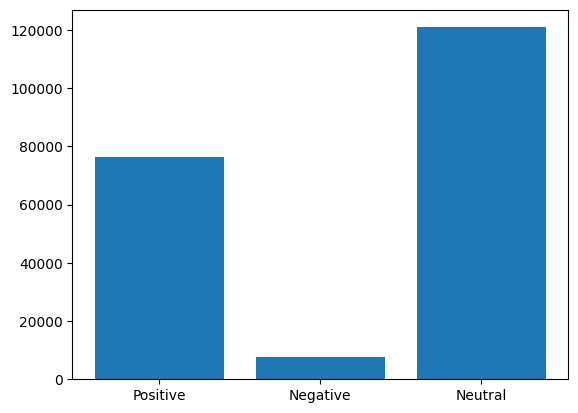

In [46]:
category_totals = data[['Positive', 'Negative', 'Neutral']].sum()
plt.bar(category_totals.index, category_totals.values)
plt.show()

In [ ]:
category_totals = data[['Positive', 'Negative', 'Neutral']].sum()
plot=bae
figure.show()

In [15]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [27]:
def analyze_sentiment(review):
    if "good" in review.lower():
        return "Positive 😊"
    elif "bad" in review.lower():
        return "Negative 😠"
    else:
        return "Neutral 🙂"

review = "This product was bad!"
sentiment = analyze_sentiment(review)
print(f"Review sentiment: {sentiment}")

Review sentiment: Negative 😠
